In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = glob.glob('*.csv')
data = vars() # vars will be used to convert string format to a variable format to read files easily.
for i in df:
    print(i[:-4])
    data[i[:-4]] = pd.read_csv(i)

best_movies_netflix
best_movie_by_year_netflix
best_shows_netflix
best_show_by_year_netflix
raw_credits
raw_titles


**I have downloaded this dataset from kaggle 'https://www.kaggle.com/datasets/thedevastator/the-ultimate-netflix-tv-shows-and-movies-dataset'
and this dataset contains 6 files mainly i,ebest_movies_netflix.csv, best_movie_by_year_netflix.csv,best_shows_netflix.csv,best_show_by_year_netflix.csv,
raw_credits.csv,raw_titles.csv**

**Now we will go through briefly about each dataset and analyze the data for pre processing**

In [3]:
best_movies_netflix

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
...,...,...,...,...,...,...,...
382,The Trip,2021,6.9,19706,113,comedy,NO
383,The Dirt,2019,6.9,47603,108,drama,US
384,Top Gun,1986,6.9,329656,110,drama,US
385,Radhe Shyam,2022,6.9,21328,138,romance,IN


In [4]:
best_movies_netflix.shape

(387, 7)

In [5]:
best_movies_netflix.isnull().any()

title              False
release_year       False
score              False
number_of_votes    False
duration           False
main_genre         False
main_production    False
dtype: bool

In [6]:
best_movies_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            387 non-null    object 
 1   release_year     387 non-null    int64  
 2   score            387 non-null    float64
 3   number_of_votes  387 non-null    int64  
 4   duration         387 non-null    int64  
 5   main_genre       387 non-null    object 
 6   main_production  387 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.3+ KB


In [7]:
best_movies_netflix.describe()

,release_year,score,number_of_votes,duration
count,387.000000,387.000000,3.870000e+02,387.000000
mean,2011.023256,7.509044,1.365206e+05,123.395349
std,10.813874,0.441906,2.342114e+05,28.371632
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2008.000000,7.100000,2.051250e+04,103.500000
50%,2014.000000,7.400000,4.520000e+04,122.000000
75%,2018.000000,7.800000,1.534855e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


In [8]:
best_movie_by_year_netflix

,title,release_year,score,main_genre,main_production
0,White Christmas,1954,7.5,romance,US
1,The Guns of Navarone,1961,7.5,war,US
2,My Fair Lady,1964,7.8,drama,US
3,Bonnie and Clyde,1967,7.7,drama,US
4,Dirty Harry,1971,7.7,thriller,US
5,The Exorcist,1973,8.1,horror,US
6,Monty Python and the Holy Grail,1975,8.2,comedy,GB
7,Taxi Driver,1976,8.3,crime,US
8,Life of Brian,1979,8.0,comedy,GB
9,The Blue Lagoon,1980,5.8,romance,US


In [9]:
best_movie_by_year_netflix.shape

(49, 5)

In [10]:
best_movie_by_year_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            49 non-null     object 
 1   release_year     49 non-null     int64  
 2   score            49 non-null     float64
 3   main_genre       49 non-null     object 
 4   main_production  49 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ KB


In [11]:
best_movie_by_year_netflix.isnull().any()

title              False
release_year       False
score              False
main_genre         False
main_production    False
dtype: bool

In [12]:
best_movie_by_year_netflix.describe()

,release_year,score
count,49.000000,49.000000
mean,1996.102041,7.871429
std,17.335230,0.632785
min,1954.000000,5.800000
25%,1984.000000,7.500000
50%,1998.000000,8.100000
75%,2010.000000,8.300000
max,2022.000000,9.000000


In [13]:
best_shows_netflix

,title,release_year,score,number_of_votes,duration,number_of_seasons,main_genre,main_production
0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,The Last Dance,2020,9.1,108321,50,1,documentary,US
...,...,...,...,...,...,...,...,...
241,Evil Genius,2018,7.5,27516,48,1,crime,US
242,13 Reasons Why,2017,7.5,282373,58,4,drama,US
243,Lupin,2021,7.5,100575,46,3,crime,FR
244,All of Us Are Dead,2022,7.5,41393,61,1,action,KR


In [14]:
best_shows_netflix.shape

(246, 8)

In [15]:
best_shows_netflix.isnull().any()

title                False
release_year         False
score                False
number_of_votes      False
duration             False
number_of_seasons    False
main_genre           False
main_production      False
dtype: bool

In [16]:
best_shows_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              246 non-null    object 
 1   release_year       246 non-null    int64  
 2   score              246 non-null    float64
 3   number_of_votes    246 non-null    int64  
 4   duration           246 non-null    int64  
 5   number_of_seasons  246 non-null    int64  
 6   main_genre         246 non-null    object 
 7   main_production    246 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.5+ KB


In [17]:
best_shows_netflix.describe()

,release_year,score,number_of_votes,duration,number_of_seasons
count,246.000000,246.000000,2.460000e+02,246.000000,246.000000
mean,2014.760163,8.093496,1.019668e+05,41.918699,3.650407
std,6.392869,0.449261,1.688746e+05,15.242579,3.191785
min,1969.000000,7.500000,1.002400e+04,16.000000,1.000000
25%,2013.000000,7.700000,1.855325e+04,27.250000,1.000000
50%,2016.500000,8.000000,4.194250e+04,44.000000,3.000000
75%,2019.000000,8.400000,1.128118e+05,51.750000,5.000000
max,2022.000000,9.500000,1.727694e+06,141.000000,21.000000


In [18]:
raw_credits

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR
77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR


In [19]:
raw_credits.shape

(77213, 5)

In [20]:
raw_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [21]:
raw_credits.isnull().any()

person_id    False
id           False
name         False
character     True
role         False
dtype: bool

In [22]:
raw_credits.describe()

,person_id
count,7.721300e+04
mean,4.994603e+05
std,6.128431e+05
min,7.000000e+00
25%,4.158400e+04
50%,1.829850e+05
75%,8.415570e+05
max,2.371585e+06


**Firstly we will start analyzing i,e data cleaning and preprocessing with raw_titles.**

In [23]:
raw_titles

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [24]:
raw_titles.shape

(5806, 12)

In [25]:
raw_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_id               5362 non-null   object 
 10  imdb_score            5283 non-null   float64
 11  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 544.4+ KB


In [26]:
raw_titles.isnull().any()

id                      False
title                    True
type                    False
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
dtype: bool

In [27]:
raw_titles.isnull().sum()/len(raw_titles)

id                      0.000000
title                   0.000172
type                    0.000000
release_year            0.000000
age_certification       0.449535
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.647434
imdb_id                 0.076473
imdb_score              0.090079
imdb_votes              0.092835
dtype: float64

In [28]:
raw_titles.drop('age_certification', axis = 1, inplace = True)

In [29]:
raw_titles.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [30]:
raw_titles.drop('seasons', axis = 1, inplace = True)

In [31]:
raw_titles.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [32]:
raw_titles['title'].value_counts()

The Gift                              3
Connected                             3
The Heirs                             2
Manhunt                               2
The Platform                          2
                                     ..
Troy: Fall of a City                  1
To All the Boys I've Loved Before     1
Extinction                            1
When We First Met                     1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 5751, dtype: int64

In [33]:
raw_titles.dropna(subset = 'title', axis = 0, inplace = True)

In [34]:
raw_titles['title'].isnull().any()

False

In [35]:
raw_titles['imdb_score'].mean()

6.5334469051675175

In [36]:
raw_titles['imdb_score'].median()

6.6

In [37]:
raw_titles['imdb_score'].fillna(raw_titles['imdb_score'].median(), inplace = True) # By considering outlier in the data we are using median(centre value) for filling the data with missing values.

In [38]:
raw_titles['imdb_score'].isnull().sum()

0

In [39]:
raw_titles['imdb_votes'].mean()

23407.194987659008

In [40]:
raw_titles['imdb_votes'].median()

2279.0

In [41]:
raw_titles['imdb_votes'].fillna(raw_titles['imdb_votes'].median(), inplace = True)

In [42]:
raw_titles['imdb_votes'].isnull().sum()

0

**Does runtime dependent on imdb_score and imdb_votes**

In [43]:
raw_titles.groupby(['runtime'])[['imdb_score', 'imdb_votes']].aggregate(['count'])

,imdb_score,imdb_votes
,count,count
runtime,,
0,24,24
2,4,4
3,8,8
4,5,5
5,7,7
...,...,...
229,1,1
230,1,1


In [44]:
raw_titles = raw_titles[raw_titles['runtime']!=0]

In [45]:
raw_titles.groupby(['runtime'])[['imdb_score', 'imdb_votes']].aggregate(['count'])

,imdb_score,imdb_votes
,count,count
runtime,,
2,4,4
3,8,8
4,5,5
5,7,7
6,11,11
...,...,...
229,1,1
230,1,1


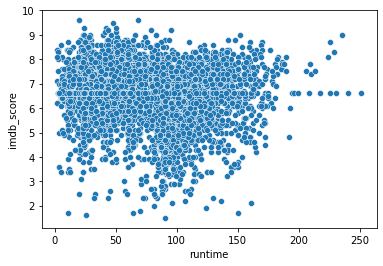

In [46]:
sns.scatterplot('runtime', 'imdb_score', data = raw_titles);

<AxesSubplot:xlabel='runtime', ylabel='imdb_votes'>

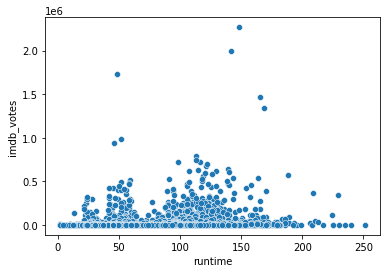

In [47]:
sns.scatterplot('runtime', 'imdb_votes', data = raw_titles)

In [48]:
raw_titles.groupby(['type'])[['imdb_score']].aggregate([max])

,imdb_score
,max
type,
MOVIE,9.0
SHOW,9.6


In [49]:
raw_titles['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

**Plot Distribution for MOVIE**

In [50]:
movie = raw_titles.loc[raw_titles['type']== 'MOVIE', 'imdb_score']
movie

1       8.3
2       8.2
3       8.0
4       8.1
6       7.7
       ... 
5800    5.8
5801    6.9
5802    6.6
5803    6.5
5804    6.2
Name: imdb_score, Length: 3758, dtype: float64

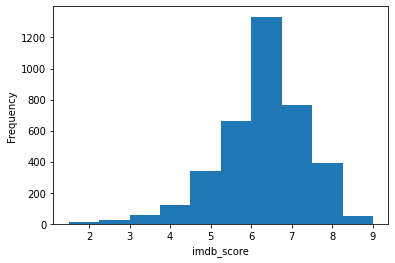

In [51]:
plt.hist(x = movie, bins = 10)
plt.xlabel('imdb_score')
plt.ylabel('Frequency');

**In this histogram plot we can observe that imdb_score started at 0.8 and ended at 9 and  we can observe that imdb_score rated high i,e 6.5 for more than 1400 movies**  

In [52]:
show = raw_titles.loc[raw_titles['type']=='SHOW', 'imdb_score']
show

0       6.6
5       8.8
29      8.1
47      8.9
55      6.9
       ... 
5785    5.1
5793    6.6
5794    6.6
5796    4.6
5799    6.6
Name: imdb_score, Length: 2023, dtype: float64

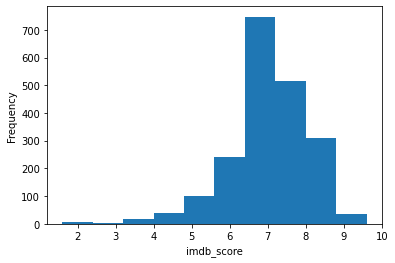

In [53]:
plt.hist(x = show, bins = 10)
plt.xlabel('imdb_score')
plt.ylabel('Frequency');

 **The above histogram says that imdb_score for show started at 0.8 and ended at 9.6, comparing to Movie imdb_score Show imdb_score is more and also we can observe that imdb_score is higher i,e 7 for shows more than 700**

In [54]:
new_type = raw_titles['type'].value_counts()
new_type

MOVIE    3758
SHOW     2023
Name: type, dtype: int64

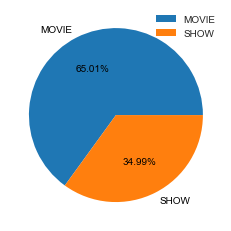

In [55]:
plt.pie(x =new_type, labels = new_type.index, autopct = '%.2f%%', data = raw_titles)
plt.style.use('seaborn')
plt.legend();

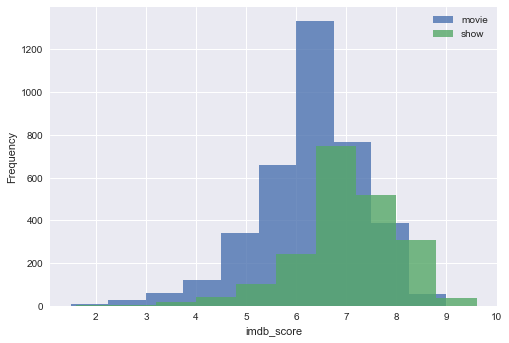

In [56]:
plt.hist(x = movie, bins =10, alpha = 0.8, label = 'movie')
plt.hist(x = show, bins = 10, alpha = 0.8, label = 'show')
plt.xlabel('imdb_score')
plt.ylabel('Frequency');
plt.legend();

In [57]:
raw_titles.head(10)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],tt0070047,8.1,391942.0
5,ts22164,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",['GB'],tt0063929,8.8,72895.0
6,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'crime', 'action']",['US'],tt0066999,7.7,153463.0
7,tm185072,My Fair Lady,MOVIE,1964,170,"['drama', 'music', 'romance', 'family']",['US'],tt0058385,7.8,94121.0
8,tm98978,The Blue Lagoon,MOVIE,1980,104,"['romance', 'drama']",['US'],tt0080453,5.8,69053.0
9,tm119281,Bonnie and Clyde,MOVIE,1967,110,"['drama', 'crime', 'action']",['US'],tt0061418,7.7,111189.0


In [58]:
raw_titles['production_countries'].unique()

array(["['US']", "['GB']", "['US', 'GB']", "['JP']", "['EG']", "['DE']",
       "['IN']", '[]', "['DZ', 'EG']", "['LB']", "['FR', 'LB', 'CA']",
       "['IN', 'SU']", "['US', 'IT']", "['HK', 'US']", "['GB', 'US']",
       "['AR']", "['KW']", "['EG', 'FR']", "['FR', 'LB']", "['US', 'JP']",
       "['US', 'CA']", "['DE', 'US']", "['US', 'DE']", "['CA', 'US']",
       "['US', 'FR']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['US', 'HK']", "['FR', 'IE', 'GB', 'DE']",
       "['GH', 'GB', 'US', 'BF', 'DE']", "['AR', 'ES']", "['FR']",
       "['MX']", "['AU']", "['CO']", "['BE', 'FR', 'NO', 'LB']",
       "['IT', 'LB', 'BE', 'FR']", "['US', 'FR', 'DE', 'PS']", "['TR']",
       "['CA']", "['GB', 'US', 'BS', 'CZ', 'DE']", "['GB', 'US', 'AU']",
       "['DE', 'ES', 'US', 'FR']", "['GB', 'US', 'AU', 'DE']",
       "['JP', 'US']", "['US', 'IS', 'GB']", "['DK']",
       "['NZ', 'JP', 'US']", "['US', 'CA', 'FR']", "['GB', 'US', 'DE']",
       "['US', 'DE', 'IT', 'GB']", "['CA', 'DE', 'US

In [59]:
import re
raw_titles['production_countries'] = raw_titles['production_countries'].apply(lambda x : re.sub('[^A-Z,]+', '', x))
raw_titles['production_countries']

0          US
1          US
2          GB
3          GB
4          US
        ...  
5800       PH
5801       NG
5802         
5803    NG,CA
5804         
Name: production_countries, Length: 5781, dtype: object

In [60]:
# raw_titles['production_countries'] = raw_titles['production_countries'].apply(lambda x : re.sub('[^A-Z,]+', ' ', x))
# raw_titles['production_countries']

In [61]:
raw_titles['production_countries'].value_counts()

US             1940
IN              604
JP              265
                226
GB              219
               ... 
PR,US,GB,CN       1
GB,US,FR          1
IT,ES,FR          1
GB,US,CZ          1
NG,CA             1
Name: production_countries, Length: 448, dtype: int64

In [62]:
raw_titles['production_countries'] = raw_titles['production_countries'].replace('', 'unknown_country')
raw_titles['production_countries']

0                    US
1                    US
2                    GB
3                    GB
4                    US
             ...       
5800                 PH
5801                 NG
5802    unknown_country
5803              NG,CA
5804    unknown_country
Name: production_countries, Length: 5781, dtype: object

In [63]:
raw_titles.shape

(5781, 10)

In [64]:
raw_titles['production_countries'].unique()

array(['US', 'GB', 'US,GB', 'JP', 'EG', 'DE', 'IN', 'unknown_country',
       'DZ,EG', 'LB', 'FR,LB,CA', 'IN,SU', 'US,IT', 'HK,US', 'GB,US',
       'AR', 'KW', 'EG,FR', 'FR,LB', 'US,JP', 'US,CA', 'DE,US', 'US,DE',
       'CA,US', 'US,FR', 'PE,US,BR', 'IT,US,FR', 'US,HK', 'FR,IE,GB,DE',
       'GH,GB,US,BF,DE', 'AR,ES', 'FR', 'MX', 'AU', 'CO', 'BE,FR,NO,LB',
       'IT,LB,BE,FR', 'US,FR,DE,PS', 'TR', 'CA', 'GB,US,BS,CZ,DE',
       'GB,US,AU', 'DE,ES,US,FR', 'GB,US,AU,DE', 'JP,US', 'US,IS,GB',
       'DK', 'NZ,JP,US', 'US,CA,FR', 'GB,US,DE', 'US,DE,IT,GB',
       'CA,DE,US', 'HK,CN', 'IT,US', 'FR,JP,US', 'US,BE', 'KR', 'IT',
       'BG,GB,US', 'US,AU', 'ES,GB', 'GB,US,JP', 'CN,HK', 'RU', 'CN',
       'SG', 'GB,US,CA', 'HK,JP', 'CA,GB,US', 'ES,FR,MX', 'IN,CA,US',
       'PS,FR,MA,DE', 'HK', 'DE,UY,ES,AR', 'ES,AR', 'US,IN', 'TW',
       'IN,US', 'MY', 'ES,CH,PS,BE,FR', 'CL,AR', 'DE,KW,PS,FR', 'CL',
       'NG', 'PS', 'GB,FR,LB', 'ZA', 'SA', 'NG,GB,US,AT,FR,DE', 'LB,FR',
       'GB,DK,NL,SE

In [65]:
raw_titles['production_countries'].isnull().sum()

0

In [66]:
raw_titles = raw_titles.loc[raw_titles['production_countries']!= 'unknown_country', :]

In [67]:
raw_titles.reset_index(drop = True, inplace = True)

In [68]:
raw_titles.shape

(5555, 10)

In [69]:
raw_titles['production_countries'].isnull().sum()

0

In [70]:
raw_titles.production_countries.values

array(['US', 'US', 'GB', ..., 'PH', 'NG', 'NG,CA'], dtype=object)

In [71]:
unique_words = []
for i in raw_titles['production_countries']:
    for j in str(i).split(','):
        if j not in unique_words:
            unique_words.append(j)

In [72]:
unique_words

['US',
 'GB',
 'JP',
 'EG',
 'DE',
 'IN',
 'DZ',
 'LB',
 'FR',
 'CA',
 'SU',
 'IT',
 'HK',
 'AR',
 'KW',
 'PE',
 'BR',
 'IE',
 'GH',
 'BF',
 'ES',
 'MX',
 'AU',
 'CO',
 'BE',
 'NO',
 'PS',
 'TR',
 'BS',
 'CZ',
 'IS',
 'DK',
 'NZ',
 'CN',
 'KR',
 'BG',
 'RU',
 'SG',
 'MA',
 'UY',
 'TW',
 'MY',
 'CH',
 'CL',
 'NG',
 'ZA',
 'SA',
 'AT',
 'NL',
 'SE',
 'PH',
 'L',
 'TH',
 'XX',
 'AE',
 'HU',
 'ID',
 'IL',
 'FI',
 'RO',
 'CD',
 'PL',
 'VE',
 'UA',
 'IR',
 'JO',
 'QA',
 'LU',
 'BY',
 'SK',
 'HR',
 'SY',
 'GL',
 'PT',
 'PK',
 'VN',
 'PR',
 'IQ',
 'KH',
 'GE',
 'CU',
 'KE',
 'VA',
 'RS',
 'AL',
 'TZ',
 'TN',
 'ZW',
 'PY',
 'NP',
 'GR',
 'CM',
 'BD',
 'KG',
 'LT',
 'CY',
 'SN',
 'MW',
 'IO',
 'MU',
 'LK',
 'AO',
 'GT',
 'MZ',
 'AF',
 'NA',
 'FO']

In [73]:
len(unique_words)

107

In [74]:
empty_matrix = np.zeros(len(unique_words))
dataframe = pd.Series(empty_matrix, index = unique_words)

In [75]:
dataframe

US    0.0
GB    0.0
JP    0.0
EG    0.0
DE    0.0
     ... 
GT    0.0
MZ    0.0
AF    0.0
NA    0.0
FO    0.0
Length: 107, dtype: float64

In [76]:
def create_empty_matrix(unique_words):
    empty_matrix = np.zeros(len(unique_words))
    dataframe = pd.Series(empty_matrix, index = unique_words)
    return dataframe

In [77]:
country_dict = dict()
idx = 0
for rows in raw_titles.production_countries.values:
    # print(rows)
    new_series = create_empty_matrix(unique_words)
    for value in rows.split(','):
        # print(value)
        new_series[value] = 1
        # print(new_series[value])
    country_dict[idx] = new_series
    idx += 1

In [78]:
country_dict

{0: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 1: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 2: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 3: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 4: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 5: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 6: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    

In [79]:
country_one_hot_encoding = pd.DataFrame(country_dict).T

In [80]:
country_one_hot_encoding

,US,GB,JP,EG,DE,IN,DZ,LB,FR,CA,...,MW,IO,MU,LK,AO,GT,MZ,AF,NA,FO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
new_raw_title = pd.concat([raw_titles, country_one_hot_encoding], axis = 1)

In [82]:
new_raw_title

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,MW,IO,MU,LK,AO,GT,MZ,AF,NA,FO
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,tm1004011,Time to Dance,MOVIE,2021,107,"['drama', 'romance']",IN,tt8622232,2.2,950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5551,ts307884,HQ Barbers,SHOW,2021,24,['comedy'],NG,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5552,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,['comedy'],PH,tt14412240,5.8,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5553,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",NG,tt13857480,6.9,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***PROBLEM STATEMENTS***

**1.0 What is the imdb_score for US Country**

In [83]:
us_imdb_score = new_raw_title.loc[new_raw_title['US']==1, 'imdb_score']

In [84]:
us_imdb_score

0       6.6
1       8.3
4       8.1
6       7.7
7       7.8
       ... 
5522    6.6
5531    6.6
5534    6.6
5537    6.6
5548    4.6
Name: imdb_score, Length: 2316, dtype: float64

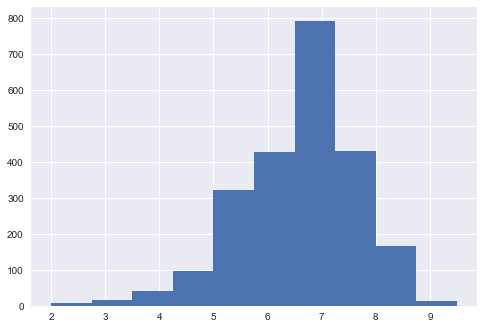

In [85]:
plt.hist(us_imdb_score, bins = 10);

**2.Among movies/shows what does US people rated most...?**

In [86]:
movies = new_raw_title.loc[(new_raw_title['type']=='MOVIE') & (new_raw_title['US']==1), 'imdb_score']
movies

1       8.3
4       8.1
6       7.7
7       7.8
8       5.8
       ... 
5470    5.4
5481    6.6
5531    6.6
5534    6.6
5537    6.6
Name: imdb_score, Length: 1533, dtype: float64

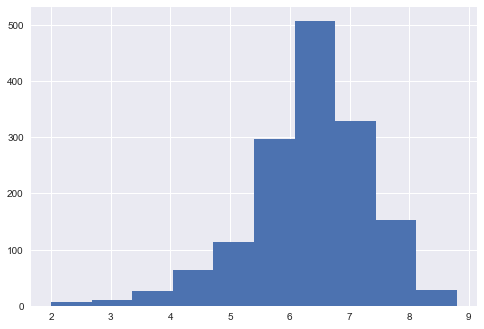

In [87]:
plt.hist(movies, bins = 10);

In [88]:
shows = new_raw_title.loc[(new_raw_title['type']=='SHOW') & (new_raw_title['US']==1), 'imdb_score']
shows

0       6.6
46      8.9
54      6.9
59      7.1
63      6.7
       ... 
5461    7.2
5472    6.5
5482    7.5
5522    6.6
5548    4.6
Name: imdb_score, Length: 783, dtype: float64

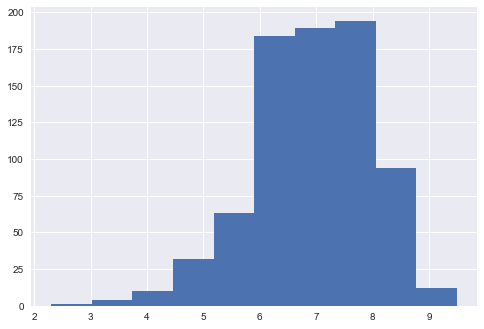

In [89]:
plt.hist(shows);

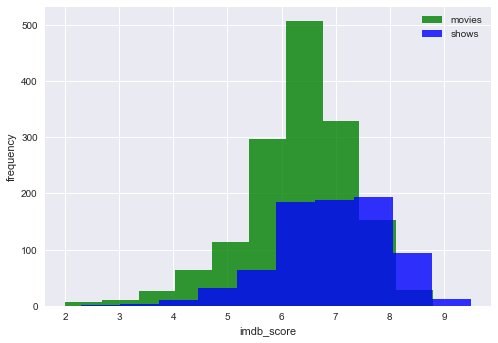

In [90]:
plt.hist(movies, bins = 10, alpha = 0.8, label = 'movies', color = 'green')
plt.hist(shows, bins = 10, alpha = 0.8, label = 'shows', color = 'blue')
plt.xlabel('imdb_score')
plt.ylabel('frequency')
plt.legend();

**3.0 Compare the global imdb_score and US imdb_score**

In [91]:
new_global = raw_titles.loc[:, 'imdb_score']
new_global

0       6.6
1       8.3
2       8.2
3       8.0
4       8.1
       ... 
5550    2.2
5551    6.6
5552    5.8
5553    6.9
5554    6.5
Name: imdb_score, Length: 5555, dtype: float64

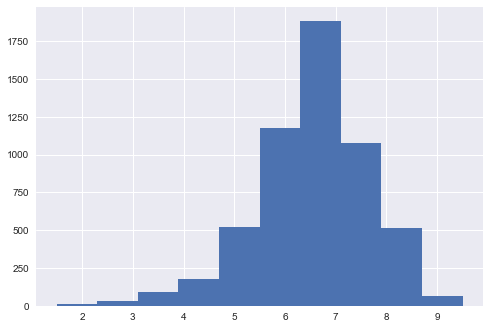

In [92]:
plt.hist(new_global);

In [93]:
new_us_title = new_raw_title.loc[new_raw_title['US']==1, 'imdb_score']
new_us_title

0       6.6
1       8.3
4       8.1
6       7.7
7       7.8
       ... 
5522    6.6
5531    6.6
5534    6.6
5537    6.6
5548    4.6
Name: imdb_score, Length: 2316, dtype: float64

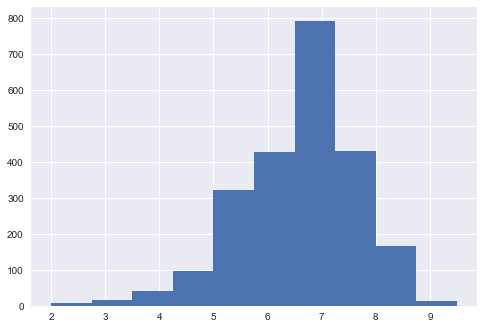

In [94]:
plt.hist(new_us_title);

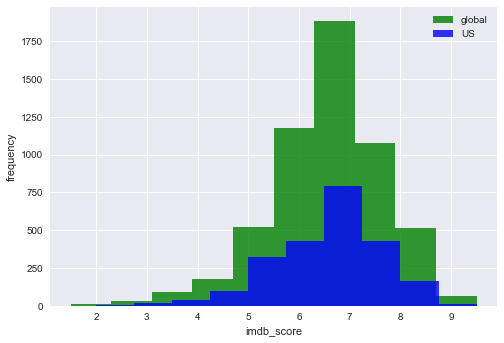

In [95]:
plt.hist(new_global, bins = 10, alpha = 0.8, color = 'green', label = 'global')
plt.hist(new_us_title, bins = 10, alpha = 0.8, color = 'blue', label = 'US')
plt.xlabel('imdb_score')
plt.ylabel('frequency')
plt.legend();

In [96]:
raw_titles.shape

(5555, 10)

In [97]:
raw_titles['genres']

0           ['documentation']
1          ['crime', 'drama']
2       ['comedy', 'fantasy']
3                  ['comedy']
4                  ['horror']
                ...          
5550     ['drama', 'romance']
5551               ['comedy']
5552               ['comedy']
5553     ['romance', 'drama']
5554      ['family', 'drama']
Name: genres, Length: 5555, dtype: object

In [98]:
raw_titles['genres'].value_counts()

['comedy']                                                                              468
['drama']                                                                               332
['documentation']                                                                       299
['comedy', 'drama']                                                                     137
['drama', 'comedy']                                                                     125
                                                                                       ... 
['animation', 'scifi', 'action', 'comedy', 'family']                                      1
['action', 'comedy', 'family', 'animation']                                               1
['war', 'drama', 'romance', 'thriller']                                                   1
['comedy', 'crime', 'family', 'fantasy', 'scifi', 'animation', 'action', 'european']      1
['music', 'romance', 'comedy']                                                  

In [99]:
raw_titles['genres'].isnull().sum()

0

In [100]:
raw_titles['genres'].unique()

array(["['documentation']", "['crime', 'drama']", "['comedy', 'fantasy']",
       ..., "['action', 'animation', 'family']",
       "['crime', 'comedy', 'drama', 'thriller', 'action']",
       "['music', 'romance', 'comedy']"], dtype=object)

In [101]:
raw_titles['genres'] = raw_titles['genres'].apply(lambda x : re.sub('[^a-z,]+', '', x))

In [102]:
raw_titles['genres'] = raw_titles['genres'].replace('', 'unknown_genres')
raw_titles['genres']

0        documentation
1          crime,drama
2       comedy,fantasy
3               comedy
4               horror
             ...      
5550     drama,romance
5551            comedy
5552            comedy
5553     romance,drama
5554      family,drama
Name: genres, Length: 5555, dtype: object

In [103]:
raw_titles = raw_titles.loc[raw_titles['genres']!= 'unknown_genres', :]

In [104]:
raw_titles.reset_index(drop = True, inplace = True)

In [105]:
raw_titles['genres']

0        documentation
1          crime,drama
2       comedy,fantasy
3               comedy
4               horror
             ...      
5509     drama,romance
5510            comedy
5511            comedy
5512     romance,drama
5513      family,drama
Name: genres, Length: 5514, dtype: object

In [106]:
raw_titles.shape

(5514, 10)

In [107]:
raw_titles['genres'].value_counts()

comedy                                                         468
drama                                                          332
documentation                                                  299
comedy,drama                                                   137
drama,comedy                                                   125
                                                              ... 
animation,scifi,action,comedy,family                             1
action,comedy,family,animation                                   1
war,drama,romance,thriller                                       1
comedy,crime,family,fantasy,scifi,animation,action,european      1
music,romance,comedy                                             1
Name: genres, Length: 1607, dtype: int64

In [108]:
raw_titles.genres.values

array(['documentation', 'crime,drama', 'comedy,fantasy', ..., 'comedy',
       'romance,drama', 'family,drama'], dtype=object)

In [109]:
unique_words_genres = []
for i in raw_titles['genres']:
    for j in str(i).split(','):
        if j not in unique_words_genres:
            unique_words_genres.append(j)

In [110]:
unique_words_genres

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'history',
 'scifi',
 'reality',
 'sport']

In [111]:
len(unique_words_genres)

19

In [112]:
empty_matrix = np.zeros(len(unique_words_genres))
dataframe = pd.Series(empty_matrix, index = unique_words_genres)

In [113]:
dataframe

documentation    0.0
crime            0.0
drama            0.0
comedy           0.0
fantasy          0.0
horror           0.0
european         0.0
thriller         0.0
action           0.0
music            0.0
romance          0.0
family           0.0
western          0.0
war              0.0
animation        0.0
history          0.0
scifi            0.0
reality          0.0
sport            0.0
dtype: float64

In [114]:
def create_empty_matrix(unique_words_genres):
    empty_matrix = np.zeros(len(unique_words_genres))
    dataframe = pd.Series(empty_matrix, index = unique_words_genres)
    return dataframe

In [115]:
country_dict = dict()
idx = 0
for rows in raw_titles.genres.values:
    # print(rows)
    new_series = create_empty_matrix(unique_words_genres)
    for value in rows.split(','):
        # print(value)
        new_series[value] = 1
    country_dict[idx] = new_series
    idx += 1

In [116]:
genres_one_hot_encoding = pd.DataFrame(country_dict).T

In [117]:
genres_one_hot_encoding

,documentation,crime,drama,comedy,fantasy,horror,european,thriller,action,music,romance,family,western,war,animation,history,scifi,reality,sport
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
genres_raw_title = pd.concat([raw_titles, genres_one_hot_encoding], axis = 1)

In [119]:
genres_raw_title.head()

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,music,romance,family,western,war,animation,history,scifi,reality,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,documentation,US,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"crime,drama",US,tt0075314,8.3,795222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"comedy,fantasy",GB,tt0071853,8.2,530877.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm70993,Life of Brian,MOVIE,1979,94,comedy,GB,tt0079470,8.0,392419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm190788,The Exorcist,MOVIE,1973,133,horror,US,tt0070047,8.1,391942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
new_raw_title.head()

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,MW,IO,MU,LK,AO,GT,MZ,AF,NA,FO
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
pd.merge(new_raw_title, genres_raw_title, left_on = 'id', right_on = 'id')

,id,title_x,type_x,release_year_x,runtime_x,genres_x,production_countries_x,imdb_id_x,imdb_score_x,imdb_votes_x,...,music,romance,family,western,war,animation,history,scifi,reality,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,tm1004011,Time to Dance,MOVIE,2021,107,"['drama', 'romance']",IN,tt8622232,2.2,950.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5510,ts307884,HQ Barbers,SHOW,2021,24,['comedy'],NG,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,['comedy'],PH,tt14412240,5.8,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5512,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",NG,tt13857480,6.9,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
genres_raw_title.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'documentation', 'crime', 'drama', 'comedy', 'fantasy', 'horror',
       'european', 'thriller', 'action', 'music', 'romance', 'family',
       'western', 'war', 'animation', 'history', 'scifi', 'reality', 'sport'],
      dtype='object')

In [123]:
gtitle = genres_raw_title.groupby(['genres'])['imdb_score'].sum()
gtitle

genres
action                                                104.0
action,animation                                       33.8
action,animation,comedy                                10.7
action,animation,comedy,crime,drama                     6.0
action,animation,comedy,drama,family,fantasy,scifi      4.8
                                                      ...  
western,fantasy,music                                   3.9
western,horror,action                                   6.0
western,thriller,action,crime,drama                     7.6
western,thriller,action,romance                         6.5
western,thriller,horror                                 5.5
Name: imdb_score, Length: 1607, dtype: float64

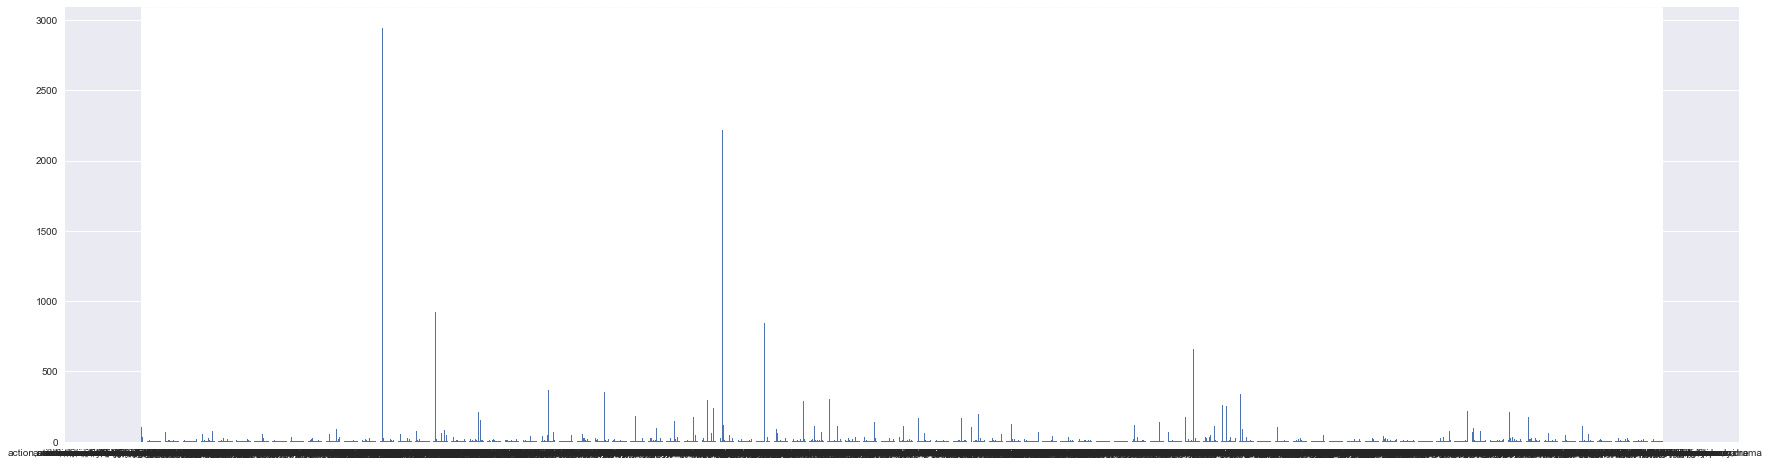

In [124]:
plt.figure(figsize = (30, 8))
plt.bar(x = gtitle.index, height = gtitle.values);

<AxesSubplot:>

<Figure size 2160x576 with 0 Axes>

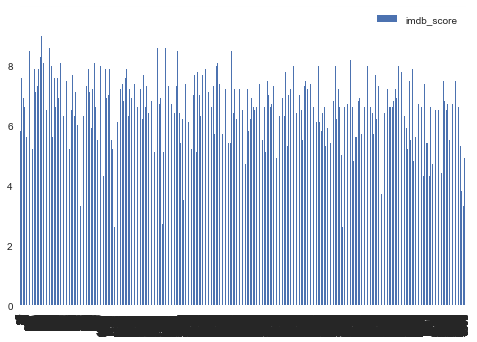

In [125]:
plt.figure(figsize = (30, 8))
genres_raw_title[['genres', 'imdb_score']].plot(kind = 'bar')

In [126]:
df1 = pd.DataFrame({'name' : ['sally', 'mary', 'john'],
      'age' : [50, 40, 30]})
df2 = pd.DataFrame({'name' : ['sally', 'peter', 'micky'],
      'age' : [77, 44, 22]})
new_df = pd.merge(df1, df2)

In [127]:
new_df

,name,age
